In [13]:
import pandas as pd
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import cv2
dataset_dir = "/home/sara/Desktop/Master-thesis/master_thesis/Dataset/"

df = pd.read_csv(f'{dataset_dir}Original_format/train_ship_segmentations_v2.csv')

In [4]:
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [5]:
directory = "yolo"
path_yolo = os.path.join(dataset_dir, directory)
os.mkdir(path_yolo)
print("Directory '% s' created" % directory)

FileExistsError: [Errno 17] File exists: '/home/sara/Desktop/Master-thesis/master_thesis/Dataset/yolo'

In [29]:
# Get image size 
img_name = "0a0df8299.jpg"
img_path = os.path.join(dataset_dir, "Original_format/train_v2",img_name)

img = Image.open(img_path)
w_image,h_image = img.size
pixels = w_image*h_image
print(img.size)

(768, 768)


In [33]:
def calculate_mask(line):
    if not pd.isna(line):
        # Create mask
        mask = np.zeros(pixels, dtype="uint8")
        line = line.split(" ")
        pair = []
        for value in line:
            pair.append(int(value))
            if len(pair) == 2:
                start = pair[0]
                end = start + pair[1]
                mask[start:end] = 1
                pair = []
        mask = mask.reshape(h_image,w_image)
        mask = np.rot90(mask, k=1)
        mask = np.flip(mask, axis=0)
        return mask
    return None

In [8]:
def calculate_bounding_box(mask):
    if mask is not None:
        # Create bounding box
        x,y,w,h = cv2.boundingRect(mask)
        centerx = int(x+(w/2))
        centery = int(y+(h/2))
        return f"0 {centerx} {centery} {w} {h}"

    return None

In [9]:

img_name = "0a0df8299.jpg"
img_path = os.path.join(dataset_dir, "Original_format/train_v2",img_name)

image = cv2.imread(img_path)

cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
one = df[df['ImageId'] == "0a0df8299.jpg"]["EncodedPixels"].values[0]
two = df[df['ImageId'] == "0a0df8299.jpg"]["EncodedPixels"].values[1]
three = df[df['ImageId'] == "0a0df8299.jpg"]["EncodedPixels"].values[2]
mask1 = calculate_mask(one)*255
mask2 = calculate_mask(two)*255
mask3 = calculate_mask(three)*255

cv2.imshow("Rectangular Mask", mask3)
cv2.waitKey(0)
cv2.destroyAllWindows()

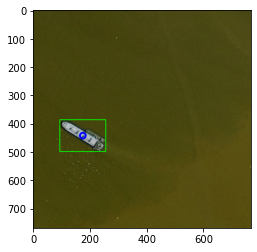

In [28]:
conimage = image.copy()
x,y,w,h = cv2.boundingRect(mask3)
centerx = int(x+(w/2))
centery = int(y+(h/2))
cv2.rectangle(conimage,(x,y),(x+w,y+h),(0,255,0),2)
cv2.circle(conimage, (centerx,centery), 10, (0, 0, 255), 5)
plt.imshow(conimage)


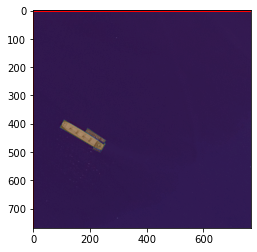

In [87]:
xstart, ystart, width, height = calculate_bounding_box(mask1)

fig, ax = plt.subplots()

ax.imshow(img)
ax.imshow(mask1, alpha=0.3)
ax.imshow(mask2, alpha=0.3)
ax.imshow(mask3, alpha=0.3)

# Create a Rectangle patch
rect = patches.Rectangle((xstart, ystart), width, height, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

In [34]:
for index, row in df.iterrows():
    # Create txt
    path = f"{os.path.join(path_yolo, row['ImageId'].strip('.jpg'))}.txt"
    file_object  = open(path, "a")

    # Create mask
    mask = calculate_mask(row["EncodedPixels"])

    # Calculate bounding box
    line = calculate_bounding_box(mask)
    
    if line is not None:
        file_object.write(f"{line} \n")

    if index == 5:
        break